# <font color=blue>OPTIM/OPTECH Laboratory Learning Session I: </font>
## <font color=blue>NETWORK OPTIMIZATION</font>

### `MASTEAM`: Master's degree in Applied Telecommunications and Engineering Management
### `MATT`: Master's degree in Advanced Telecommunication Technologies
### `CoDaS`: Erasmus Mundus master's degree in Communications, Engineering and Data Science

#####  Castelldefels School of Telecommunications and Aerospace Engineering (EETAC)

**<font color=teal>Cristina Cervelló-Pastor (cristina.cervello@upc.edu)</font>**

<div style="text-align: justify"> <b><font color=blue>Network Optimization</font></b> lies in the middle of the great divide that separates the two major types of optimization problems, continuous and discrete.</div>
<br>

<div style="text-align: justify"> The most common class of practical Network Optimization problems are: shortest path,  assignment,  locating acilities, max-flow,  transportation, transhipment, spanning tree, matching, traveling salesman, vehicle routing, and multicommodity flow.</div>
<br>
<div style="text-align: justify"> Network flow problems consist of supply and demand points, together with several routes that connect these points and are used to transfer the supply to the demand. These routes may contain intermediate transhipment points.  Often, the supply, demand, and transhipment points can be modeled by the nodes of a graph, and the routes can be modeled by the paths of the graph. Furthermore, there may be multiple “types” of supply/demand (or “commodities”) sharing the routes.  There may also be some constraints on the characteristics of the routes, such as their carrying capacities,  and some costs associated with using particular routes. Such situations are naturally modeled as network optimization problems whereby, roughly speaking, we try to select routes that minimize the cost of transfer of the supply to the demand. </div>

<a href="..."></a>
https://web.mit.edu/dimitrib/www/netbook_Full_Book_NEW.pdf


# <font color=green><b>SHORTEST PATH PROBLEM</b></font>

Compute the shortest path from source node to destination node:

<ul>
<li> Given a directed network with link costs</li>
<li> The goal is to find the optimal (i.e., minimum cost) route through the network from a source to node a destination node. </li>
<li> The constraints are: Flow conservation at each node: input flow equal to output flow: </li>
<ul>
<li> At origin: output flow equal to 1 </li>
<li> At destination: input flow equal to 1 </li>
<li> At intermediate nodes: input flow equal to output flow </li>
</ul>
</ul>
</li>
</ul>

#### Parameters: ####
$G(V,E)$ Directed graph being $V$ set of nodes (vertices) and $E$ set of links (edges or arcs)
<br /> <br />
$(i,j)\in E$ link between nodes $i$ and $j$
<br /> <br />
$w_{ij}$ weight or cost of link $(i,j)$
<br /> <br />
$s \in V$ source node
<br /> <br />
$t \in V$ destination node

#### Variables: ####
$x_{ij}$ binary variable indicating if link $(i,j$) is active or not (therefore, $x_{ij}=1$ if link $(i,j$) is part of the shortest path betwen source and destination, 0 otherwise)
<br /> <br />


\begin{alignat*}{3}
&\\
\mbox{minimize } & \sum_{\forall (i,j)\in E} w_{ij}\cdot x_{ij} &&\\
\mbox{subject to: }& &&\\
&\boxed{\left.
\renewcommand\arraystretch{1.5}
                \begin{array}{ll}
                \displaystyle\sum_{\forall (i,j)\in E} x_{ij} - \sum_{\forall (j,i)\in E} x_{ji}= 1\quad & \forall i = s\\
                \displaystyle\sum_{\forall (i,j)\in E} x_{ij} - \sum_{\forall (j,i)\in E} x_{ji}= 1 &\forall j = t \\
                \displaystyle\sum_{\forall (i,j)\in E} x_{ij} - \sum_{\forall (j,i)\in E} x_{ji} = 0& \forall i \neq \{s,t\}
                \end{array}
                \right.} \qquad \mbox{Flow conservation constraints}&&\nonumber\\
& x_{ij}\ \mbox{binary} \quad  \forall (i,j)\in E.&&\nonumber
\end{alignat*}



In [229]:
!pip install Pyomo
!apt-get install -y -qq glpk-utils


### <font color=purple>Python functions to create  and plot the scenario</font>

In [230]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import chain
from collections import defaultdict
import numpy as np

##############################################################
# Function to draw a network given the node positions,       #
# link costs, link capacities, source and destination nodes  #
##############################################################

def DrawNetwork(pos, linkcost, linkcapacity, source, destination):
    # Create figure
    fig, ax = plt.subplots(1, 1)

    G = nx.DiGraph()

    G.add_nodes_from(list(pos.keys()))
    G.add_edges_from(list(linkcost.keys()))

    # nodes
    nx.draw_networkx(G, pos,
                     nodelist=list(pos.keys()),
                     node_color='#10bb30',
                     node_size=850,
                     with_labels=True)

    # edges (link cost and link capacity, if any)
    # join linkcost and linkcapacity dictionaries
    weigth = defaultdict(list)
    for k, v in chain(linkcost.items(), linkcapacity.items()):
        weigth[k].append(v)

    nx.draw_networkx_edge_labels(G,pos,edge_labels=weigth,
                                 label_pos=0.4,
                                 font_size=9,
                                 font_family='sans-serif'
                                )

    # Write notes
    if bool(linkcapacity): note='[Link Cost, Link Capacity]'
    else: note='[Link Cost]'

    ax.annotate(note,
                xy=(3.6, 2.4),
                xytext=(4.2, 2.8),
                size=12,
                color='b',
                arrowprops=dict(facecolor='red', fc="blue",ec="blue",
                                width=1, shrink=0.08),
                                horizontalalignment='left',
                                verticalalignment='bottom')



    if (source!=0):ax.annotate('Source', xy=(0.7, 2.2),size=12, color='g')
    if (destination!=0):ax.annotate('Destination', xy=(4, 2.2),size=12, color='g')

    plt.axis('off')
    plt.show()

### SCENARIO

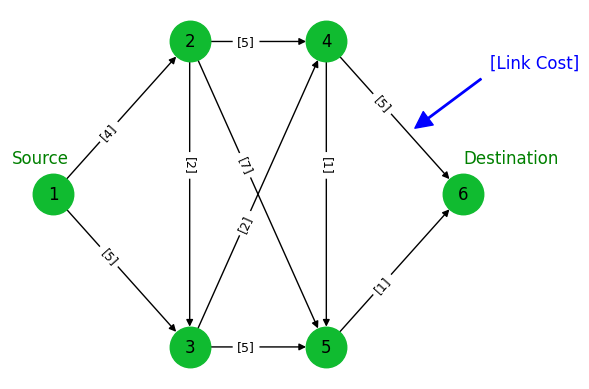

In [231]:
# Data related to the scenario
NumNodes = 6
NodePosition = {1:(1,2),2:(2,3),3:(2,1),4:(3,3),5:(3,1),6:(4,2)}

# Dictionary with the cost for each link. For example, link between nodes (1,2)
# has cost equal to 3.
LinkCost = {(1, 2): 4, (1, 3): 5,(2, 3): 2, (2, 4): 5, (2, 5): 7,\
            (3, 4): 2, (3, 5): 5,(4, 5): 1, (4, 6): 5, (5, 6): 1}

# Source and destination nodes
Source = 1
Destination = 6

# Plot the network
# For the first example we don't have link capacities
DrawNetwork(NodePosition, LinkCost, {}, Source, Destination)

### MODEL

In [232]:
# Libraries needed
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.core import Var

In [233]:
######################
## CREATE THE MODEL ##
######################

model = AbstractModel()


######################
## MODEL PARAMETERS ##
######################

# Pyomo parameters will be defined with default values (using the initialize option).
# Therefore, an input file is not necessary to execute the model.

# NETWORK INFORMATION

# Set of network nodes
model.V = RangeSet(1,NumNodes)

# Set of network edges (between two nodes, so dimension=2). Initialize the cost of each edge.
model.E = Set(dimen=2, initialize=list(LinkCost.keys()))

# Weight or cost of each link
model.cost = Param(model.E, initialize=LinkCost)



#####################
## MODEL VARIABLES ##
#####################

# x[i,j]=1 if link (i,j) is part of the shortest path between source and destination,
# and 0 otherwise
model.x = Var(model.E, within=Binary, initialize=0)


########################
## OBJECTIVE FUNCTION ##
########################

##def Objective_rule(model):
  # return sum(model.cost[i,j]*model.x[i,j] for i,j in model.E)
#model.Objective = Objective(rule=Objective_rule, sense=minimize)



def Objective_rule(model):
    return sum(model.x[i,j] for i,j in model.E)
model.Objective = Objective(rule=Objective_rule, sense=minimize)

#################
## CONSTRAINTS ##
#################

'''CONSTRAINT 1'''
# Flow conservation constraint at each node:
# at origin node: outFlow - inFlow = 1,
# at destination node: inFlow - outFlow = 1,
# and at the rest of nodes: inFlow - outFlow = 0.

def flow_rule(model, v):

    inFlow  = sum(model.x[j,i] for (j,i) in model.E if i == v)
    if (v == Source):
        inFlow = inFlow + 1

    outFlow = sum(model.x[i,j] for (i,j) in model.E if i == v)
    if (v == Destination):
        outFlow = outFlow + 1

    return inFlow == outFlow

model.flow = Constraint(model.V, rule=flow_rule)


#### SOLVE THE MODEL

In [234]:
# Construct the instance of the model and pass it to an (external) solver, in this case GLPK
opt = SolverFactory('glpk', executable = '/usr/bin/glpsol')
instance = model.create_instance()
results = opt.solve(instance)

#### GET THE RESULTS

In [235]:
# Print the results
print ("Shortest path: ", end="")
for i in instance.V:
    for j in instance.V:
        if (i,j) in LinkCost.keys():
            if instance.x[i,j].value!=0:
                print(i,"- ", end="")
print(j) # last node of the path (destination)

print("Path performance: ",instance.Objective())

Shortest path: 1 - 3 - 5 - 6
Path performance:  3.0


### <font color=blue><b>EXERCISE 1</b></font>.-
#### What measures the path performance?

In [236]:
'''9.0. The path is 1 - 3 - 4 - 5 - 6'''

'9.0. The path is 1 - 3 - 4 - 5 - 6'

### <font color=blue><b>EXERCISE 2</b></font>.-
####  Considering the initial link costs, what's the difference if we consider as a objective function the following one? Copy the code in the corresponding cell above (and comment the previous objective function). Execute it and verify the result. What measures now the path performance?

```python

def Objective_rule(model):
    return sum(model.x[i,j] for i,j in model.E)
model.Objective = Objective(rule=Objective_rule, sense=minimize)
```



In [237]:
'''3.0. The path is 1 - 3 - 5 - 6'''

'3.0. The path is 1 - 3 - 5 - 6'

### <font color=blue><b>EXERCISE 3</b></font>.-
####   Modify the problem of Exercise 2 to find the shortest path to transmit a specific traffic demand, which cannot be split onto different routes, i.e., the complete connection is routed through a single path (flow conservation at each node for each demand).  We have to take into account that the total flow on each link must be less than the link's capacity. The demand will be defined by a triple (source, destination, demand).

#### Therefore we have to add a new parameter:  
       Demand = 3

       model.del_component('h')
       
       # h traffic demand
       model.h = Param(initialize=Demand)


#### we also need to add link capacities:

       LinkCapacity = {(1, 2): 3, (1, 3): 3,(2, 3): 5, (2, 4): 5, (2, 5): 7,(3, 4): 2,(3, 5): 5,(4, 5): 2,(4, 6): 5,(5, 6): 4}


       
       # Capacity of each link
       model.del_component('capacity')
       model.capacity = Param(model.E, initialize=LinkCapacity)

#### The scenario is as follows:

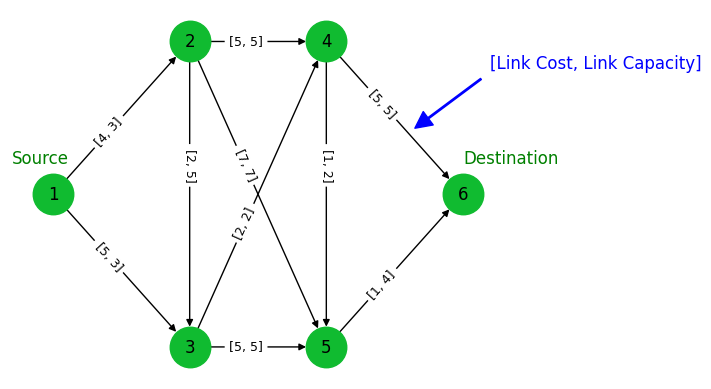

In [238]:
LinkCapacity = {(1, 2): 3, (1, 3): 3,(2, 3): 5, (2, 4): 5, (2, 5): 7,\
                (3, 4): 2, (3, 5): 5,(4, 5): 2, (4, 6): 5, (5, 6): 4}

Demand = 3

DrawNetwork(NodePosition, LinkCost, LinkCapacity, Source, Destination)

#### and we need to add the capacity constraint (enforce an upper limit on the flow across each arc):    $x_{ij}\cdot h <= C_{ij}\quad\forall (i,j)\in E $.


```python

# Capacity Constraint
def CapacityConst_rule(model,i,j):
    return XXXXXXX

model.CapacityConst = Constraint(model.E, rule=CapacityConst_rule)
```

#### Decide what to program in the XXXXXXX part of the constraint. Please, copy the code of the whole model in the cell below, modify it by adding the new constraint, and run it. Explain the result.


In [239]:
'''The result is the same as the previous one, using objective function 2.
We are using the same objective function in both the programs and the capacity constraint is not affecting the links.
If the new constraint had affected the links, the result would have been different, as some of the links would not be able to work.
It returns the optimum path and the minimum nodes we need to pass.'''

'The result is the same as the previous one, using objective function 2.\nWe are using the same objective function in both the programs and the capacity constraint is not affecting the links.\nIf the new constraint had affected the links, the result would have been different, as some of the links would not be able to work.\nIt returns the optimum path and the minimum nodes we need to pass.'

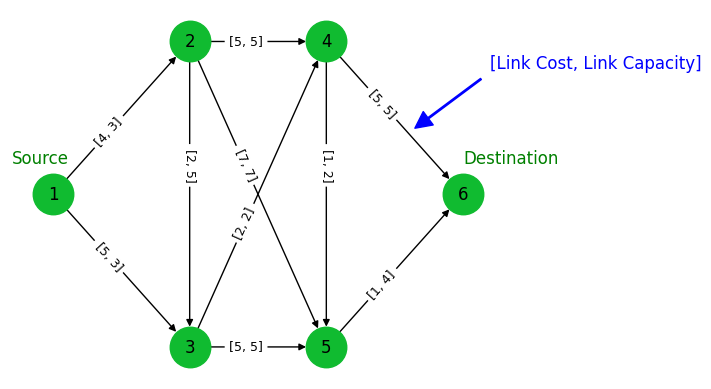

In [240]:
LinkCapacity = {(1, 2): 3, (1, 3): 3,(2, 3): 5, (2, 4): 5, (2, 5): 7,\
                (3, 4): 2, (3, 5): 5,(4, 5): 2, (4, 6): 5, (5, 6): 4}

Demand = 3
DrawNetwork(NodePosition, LinkCost, LinkCapacity, Source, Destination)


# Capacity of each link
model.del_component('capacity')
model.capacity = Param(model.E, initialize=LinkCapacity)
model.del_component('h')

   # h traffic demand
model.h = Param(initialize=Demand)

'''capacity CONSTRAINT'''

def CapacityConst_rule(model,i,j):
    return model.x[i,j]*model.h <= model.capacity[i,j]

model.CapacityConst = Constraint(model.E, rule=CapacityConst_rule)


In [241]:
# Construct the instance of the model and pass it to an (external) solver, in this case GLPK
opt = SolverFactory('glpk', executable = '/usr/bin/glpsol')
instance = model.create_instance()
results = opt.solve(instance)

In [242]:
# Print the results
print ("Shortest path: ", end="")
for i in instance.V:
    for j in instance.V:
        if (i,j) in LinkCost.keys():
            if instance.x[i,j].value!=0:
                print(i,"- ", end="")
print(j) # last node of the path (destination)

print("Path performance: ",instance.Objective())

Shortest path: 1 - 3 - 5 - 6
Path performance:  3.0


# <font color=green><b>SERVICE PLACEMENT PROBLEM</b></font>

<div style="text-align: justify">We formulate the service placement problem in dense multi-cell MEC networks aiming to minimize the load of the centralized cloud. We consider practical features of these systems such as overlapping coverage regions of BSs and multi-dimensional (storage, computation, and communication) resource constraints.</div>

<b>Objective</b>: Decide  which  BSs offers the service to each user.

<br>
<div style="text-align: justify"> We consider a MEC system consisting of a set N BSs equipped with storage, computation, and communication capabilities, and a set U of mobile users, subscribers of the MEC operator. The users may be arbitrarily distributed over the (possibly overlapping) coverage regions of the BSs, where Nu ⊆ N denotes the set of BSs covering user u.</div>
<br>
<div style="text-align: justify"> There are multiple types of resources for the MEC BSs. First, each BS $n$ has storage capacity $R_n$ (hard disk) that can be used to pre-store data associated with services. Second,
BS $n$ has a CPU of computation capacity (i.e., maximum frequency) $C_n$ that can be used to execute services in an on-demand manner. Third, BS $n$ has uplink (downlink) bandwidth capacity $Bu_n$ ($Bd_n$) that can be used to upload (download) data from (to) mobile users requesting services.</div>
    <br>
<div style="text-align: justify"> The system offers a set $S$ of latency-sensitive services to the mobile users including video streaming, face Recognition, data compression, augmented reality. Services may have different requirements in terms of storage, CPU cycles, and uplink/downlink bandwidth resources. </div>
   <br>
<div style="text-align: justify"> The system receives service requests from the users in a stochastic manner. Without loss of generality, we assume that each user $u$ performs one request for a service. We denote by $r_u$ the storage space occupied by the data associated with service of user $u$. The notation $c_u$ indicates the required computation, while $bu_{u}$ and $bd_{u}$ indicate the uplink and downlink bandwidth required to satisfy a request for service of user $u$, respectively.</div>
    
<div style="text-align: justify"> The request of user $u$ can be connected to a BS in $N_u$ (set of BSs covering the user) provided that this service is locally stored and the BS has enough computation, storage and bandwidth resources. If there is no such BS, it is assumed that the user can access the centralized cloud, which serves as a last resort for all users. Accessing the cloud, however, may cause high delay due to its long distance from the users, and therefore should be avoided.</div>


#### PARAMETERS: ####
$N$ Set of base stations equipped with storage, computation and communications capabilities
<br /> <br />
$R_n$ Storage in GB for each BS $n$
<br /> <br />
$C_n$  Computation in GHz for each BS $n$
<br /> <br />
$Bu_n$ Uplink Bandwidth in Mbps for each BS $n$
<br /> <br />
$Bd_n$ Downlink Bandwidth in Mbps for each BS $n$
<br /> <br />

$Cl$ Set containing an extra equippment in the centralized cloud (with ilimited resources)
<br /> <br />

$U$ Set of mobile users, subscribers of the MEC operator
<br /> <br />
$Nu_{u}$ Set of BSs covering each user
<br /> <br />
    
$Nu_{u} | C_l$  union of sets
<br /> <br />
    
    
$Su_{u}$  Set of user services (one service per user)
<br /> <br />
$r_u$ Storage in GB for each user $u$
<br /> <br />
$c_u$  Computation in GHz for each  user $u$
<br /> <br />
$bu_u$ Uplink Bandwidth in Mbps for each  user $u$
<br /> <br />
$bd_u$ Downlink Bandwidth in Mbps for each  user $u$
<br /> <br />

#### VARIABLES: ####
$x_{nu}$ binary variable, $x_{nu}=1$ if client $u$ is connected to BS $n$ or the centralized cloud, 0 otherwise.
    <br />
$x_{cu}=1$ corresponds to the user $u$ connected to the centralized cloud (i.e., n=c)
<br /> <br />

#### MODEL: ####
\begin{align}
&\\
\renewcommand\arraystretch{2}
\mbox{minimize } & \sum_{\forall u\in U} x_{cu}  &&\\[8pt]
\mbox{subject to: }& \sum_{\forall n\in Nu_{u} | Cl} x_{nu} = 1\quad&&  \forall u \in U\qquad\qquad
&&\nonumber\\[8pt]
&\sum_{\forall u\in U}  x_{nu}\cdot r_{u}\leq R_n\quad&&  \forall n \in N \quad&&\nonumber\\[8pt]
&\sum_{\forall u\in U}  x_{nu}\cdot c_{u}\leq C_n\quad&&  \forall n \in N \quad&&\nonumber\\[8pt]
&\sum_{\forall u\in U}  x_{nu}\cdot bu_{u}\leq Bu_n\quad&&  \forall n \in N \quad&&\nonumber\\[8pt]
&\sum_{\forall u\in U}  x_{nu}\cdot bd_{u}\leq Bd_n\quad&&  \forall n \in N \quad&&\nonumber\\[8pt]
& x_{nu} \mbox{  binary} \quad&&  \forall n \in N,\ \forall u\in U.&&\nonumber
\end{align}


### <font color=purple>Python functions to create  and plot the scenario</font>

In [243]:
import random
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import collections as mc
import numpy as np
from scipy.stats import zipf

In [244]:
###########################################
# Function to the uniform location of BSs #
###########################################

def BSLocation(number, radius, distance):
    points_set = []
    n=0
    rows = int(number/3) # at most 3 BSs per row
    for j in range(rows+1):
        for i in range(3):
            if n<number:
                coords = [radius+i*distance, \
                          radius+j*distance]
                points_set.append(coords)
                n+=1
    return points_set



#############################################
# Function to the uniformly random location #
# of mobile users over the BS coverage area #
#############################################

def MobileLocation(w, h, number):
    points_set = []
    i = 0
    while i < number:
        coords = [random.uniform(0,w-1), \
                  random.uniform(0,h-1)]
        for b in range (0,Nbs):
            if(isInside(BSLoc[b][0], BSLoc[b][1], radius, coords[0], coords[1])):
                points_set.append(coords) # consider only users inside any BS coverage area
                i+=1
                break

    return points_set



############################################################
# Decide if a user position is inside the BS coverage area #
############################################################
def isInside(BS_x, BS_y, radius, x, y):

    # Compare radius of BS with distance of its center
    # from given point
    if ((x - BS_x) * (x - BS_x) +
        (y - BS_y) * (y - BS_y) <= radius * radius):
        return True;
    else:
        return False;



######################################
# Calculate wich BSs cover each user #
######################################
def UserCoverage(Nbs, CustomerLocation, BSLocation, NumMobileUsers):

    UserCoverageBS = {}
    for u in range(0,NumMobileUsers):
        UserCoverageBS[u+1]=[]
        for b in range (0,Nbs):
            if(isInside(BSLocation[b][0], BSLocation[b][1], radius, \
                        CustomerLocation[u][0], CustomerLocation[u][1])):
                UserCoverageBS[u+1].append(b+1)

    return (UserCoverageBS)



################################################################
# Generate Zipf-like random variables with shape parameter 'a' #
# in inclusive [min...max] interval                            #
################################################################

def Zipf(a: np.float64, min: np.uint64, max: np.uint64, size=None):
    if min == 0:
        raise ZeroDivisionError("")

    v = np.arange(min, max+1) # values to sample
    p = 1.0 / np.power(v, a)  # probabilities
    p /= np.sum(p)            # normalized

    return np.random.choice(v, size=size, replace=True, p=p)



#########################################################
# Function to calculate the distance between two points #
#########################################################

def Distance(p1, p2):
    return round(math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2),2)



#####################################################################
# Function to plot Customer and BSs Locations on a W x H area.      #
# If customers are already assigned to different BSs, the parameter #
# "assignment" is the list of relations customer-facility. In the   #
# same way, if there are users connected to the cloud, this         #
# parameter contains the related information.                       #
#####################################################################

def PlotArea(w, h, CustomerLocation, BSLocation, assignment, cloud):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal', adjustable='box')


    ax.tick_params(axis = 'both',  labelsize = 8)

    if (assignment != []):
        lc = mc.LineCollection(assignment, colors= (0.7,0.4,0.8), \
                               linestyle= (0, (6, 4)),linewidths=0.75, zorder=1)
        ax.add_collection(lc)

    ax.set_xlim([0,w-1])
    ax.set_ylim([0,h-1])
    CL = plt.scatter(*zip(*CustomerLocation),marker='.', c='blue', s=10)
    FL = plt.scatter(*zip(*BSLocation),marker='^',c='green', s=100)

    if len(cloud)!=0:
        CloudL = [[list_of_values[1],list_of_values[2]] for list_of_values in cloud]
        C = plt.scatter(*zip(*CloudL),marker='+',c='red', s=50)

    n = [i+1 for i,x in enumerate(BSLocation)]
    for i in [i+1 for i,x in enumerate(BSLocation)]:
        ax.annotate(' BS '+str(i), (BSLocation[i-1][0]+0.3,BSLocation[i-1][1]+0.1),\
                    color='green',fontsize=15)
        circle = Circle((BSLocation[i-1][0],BSLocation[i-1][1]), radius, \
                        color='green',linewidth=0.5, fill=False, linestyle='--')
        ax.add_patch(circle)

    n = [i+1 for i,x in enumerate(CustomerLocation)]
    for i in [i+1 for i,x in enumerate(CustomerLocation)]:
        if i not in [list_of_values[0] for list_of_values in cloud]:
            ax.annotate(str(i), (CustomerLocation[i-1][0]+0.3,CustomerLocation[i-1][1]+0.1),\
                        color='blue',fontsize=8)

    n = [i+1 for i,x in enumerate(cloud)]
    for i in [i+1 for i,x in enumerate(cloud)]:
        ax.annotate(str(cloud[i-1][0]), (cloud[i-1][1]+0.3,cloud[i-1][2]+0.1),\
                    color='red',fontsize=10)


    if len(cloud)!=0:
        scatter = (CL, FL, C)
        leg = ('Customer Locations', 'MEC Operator BS Locations', 'User connected to cloud')
        col = 3
    else:
        scatter = (CL, FL)
        leg = ('Customer Locations', 'MEC Operator BS Locations')
        col = 2

    plt.legend(scatter, leg,
               scatterpoints=1,
               loc=9,
               bbox_to_anchor=(0.5, -0.1),
               ncol = col,
               fontsize=12)


    plt.show()

### SCENARIO

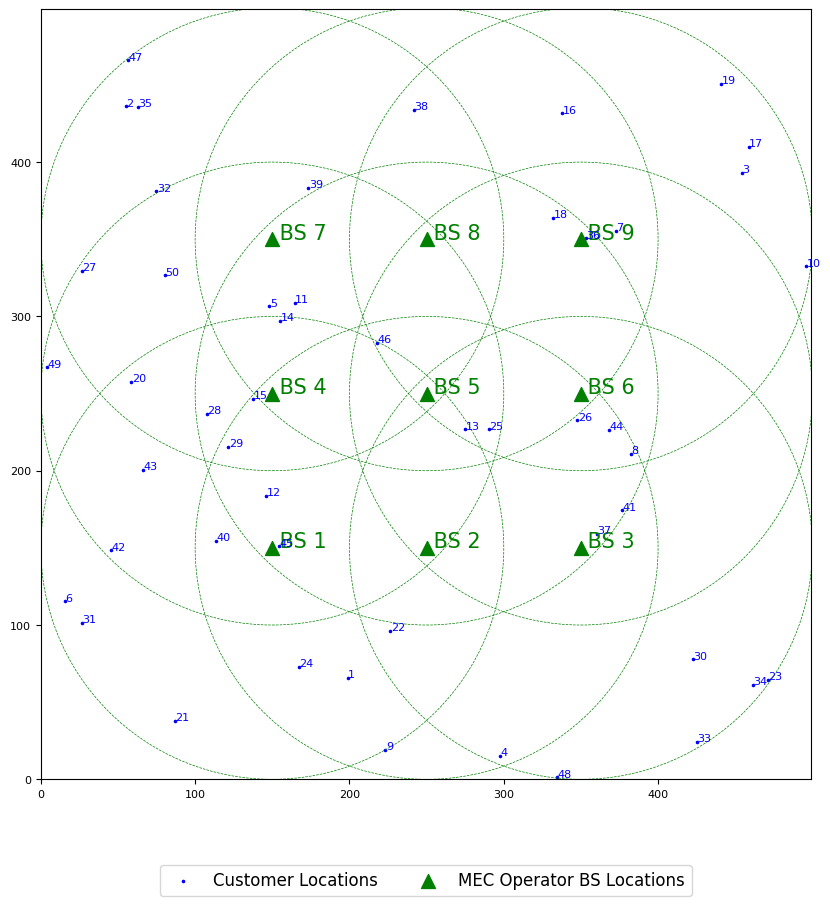

In [245]:
# Define the area
W, H = 500, 500    # meters

# Number of Base Station with MEC resources
Nbs = 9

# Coverage radius of each BS
radius = 150 # meters

# Distance between BSs
dist = 100 # meters

# BS resources location pf the MEC system
BSLoc = BSLocation(Nbs, radius, dist)

# Mobile users
NumMobileUsers = 50
CustomerLoc = MobileLocation(W, H, NumMobileUsers)


# Parameters of each BS
Stg = 200 # Storage capacity in GBs
Comp = 20 # Computation capacity in GHz
Bup = 100 # Uplink capacity in Mbps
Bdown = 250 # Downlink capacity in Mbps

# Calculate which BSs cover each user
UserCoverageBS = UserCoverage(Nbs, CustomerLoc, BSLoc, NumMobileUsers)

# Plot the area
PlotArea(W,H,CustomerLoc,BSLoc,[],[])

### SERVICES

In [246]:
# TYPES OF SERVICES
# 1: Video streaming (VS)
# 2: Face Recognition: (FR)
# 3: Data compression (Gzip)
# 4: Augmented Reality (AR)

# PARAMETERS OF EACH SERVICE
# 1: Storage in GB
# 2: Computation capacity in GHz
# 3: Uplink Bandwidth in Mbps
# 4: Downlink Bandwidth in Mbps


NumServices = 4

D = 10000000000 # maximum distance in meters between a user and its BS

ServicesDict = {}

parameters = ['Storage','Computation','Uplink', 'Downlink']

Storage = [(1, [1,10]), (2, [2,10]), (3, [0.02,0.02]), (4, [2,20])] # in GB
ServicesDict[parameters.index('Storage')+1]= dict(Storage)

Computation = [(1, [0,0]), (2, [0.375,3]), (3, [0.04,0.32]), (4, [0.375,3])] # in GHz
ServicesDict[parameters.index('Computation')+1]= dict(Computation)

Uplink = [(1, [0,0]), (2, [1,8]), (3, [1,8]), (4, [1,8])] # in Mbps
ServicesDict[parameters.index('Uplink')+1]= dict(Uplink)

Downlink = [(1, [1,25]), (2, [0,0]), (3, [0.25,2]), (4, [0.25,2])] # in Mbps
ServicesDict[parameters.index('Downlink')+1]= dict(Downlink)

print('Services Dictionary: For each service, the range of values for each parameter')
print(ServicesDict)


# Generate one service per user using the service popularity Zipf distribution
Serv = Zipf(0.8, 1, NumServices, NumMobileUsers)

# Determine the service parameters of each user
Services = dict((i+1, [random.uniform(ServicesDict[s][p][0],ServicesDict[s][p][1])\
                       for p in range(1,NumServices+1)])\
                  for i, s in enumerate(Serv) )

# List of resources required for users
p = parameters.index('Storage')
ListStorage = [list_of_values[p] for list_of_values in Services.values()]
p = parameters.index('Computation')
ListComputation = [list_of_values[p] for list_of_values in Services.values()]
p = parameters.index('Uplink')
ListUplink = [list_of_values[p] for list_of_values in Services.values()]
p = parameters.index('Downlink')
ListDownlink = [list_of_values[p] for list_of_values in Services.values()]

Services Dictionary: For each service, the range of values for each parameter
{1: {1: [1, 10], 2: [2, 10], 3: [0.02, 0.02], 4: [2, 20]}, 2: {1: [0, 0], 2: [0.375, 3], 3: [0.04, 0.32], 4: [0.375, 3]}, 3: {1: [0, 0], 2: [1, 8], 3: [1, 8], 4: [1, 8]}, 4: {1: [1, 25], 2: [0, 0], 3: [0.25, 2], 4: [0.25, 2]}}


### MODEL

In [247]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.core import Var

In [248]:
######################
## CREATE THE MODEL ##
######################

model = AbstractModel()


######################
## MODEL PARAMETERS ##
######################

# Set of base stations equipped with storage, computation and communications capabilities
model.N = RangeSet(1,Nbs)

# Resources parameters of each BS
model.R  = Param(model.N, within=Any, initialize=Stg) #Storage in GB
model.C  = Param(model.N, within=Any, initialize=Comp) # Computation in Ghz
model.Bu = Param(model.N, within=Any, initialize=Bup) # Uplink Bandwidth in Mbps
model.Bd = Param(model.N, within=Any, initialize=Bdown) # Downlink Bandwidth in Mbps

# An extra equippment is in the centralized cloud (with ilimited resources)
model.Cloud = Set(initialize=[Nbs+1])

# Set of mobile users, subscribers of the MEC operator
model.U = RangeSet(1,NumMobileUsers)

# Set of BSs covering each user
model.Nu = Param(model.U, within=Any, initialize=UserCoverageBS)

# Set of services
model.S = RangeSet(1,len(Services))

# Set of user services
model.Su = Param(model.U, within=Any, initialize=Services)


#####################
## MODEL VARIABLES ##
#####################

# x_{nu} = 1 if request of user u is connected to BS n or the cloud, 0 otherwise
model.x = Var(model.N | model.Cloud, model.U,  within=Binary, initialize=0)


########################
## OBJECTIVE FUNCTION ##
########################

def Objective_rule(model):
    return sum(model.x[Nbs+1,u] for u in model.U)

model.Objective = Objective(rule=Objective_rule, sense=minimize)


#################
## CONSTRAINTS ##
#################

'''CONSTRAINT 1'''
def OneBSperUser_rule(model,u):
    return sum(model.x[n,u] for n in model.Nu[u] | model.Cloud)==1

model.OneBSperUser = Constraint(model.U, rule=OneBSperUser_rule)


'''CONSTRAINT 2'''
# The total amount of service data placed in a BS must no exceed its storage capacity
def StorageCapacity_rule(model,n):
    return sum(model.x[n,u]*ListStorage[u-1] for u in model.U) <= model.R[n]

model.StorageCapacity = Constraint(model.N, rule=StorageCapacity_rule)


'''CONSTRAINT 3'''
# The total amount of service data placed in a BS must no exceed its computation capacity
def ComputationCapacity_rule(model,n):
    return sum(model.x[n,u]*ListComputation[u-1] for u in model.U) <= model.C[n]

model.ComputationCapacity = Constraint(model.N, rule=ComputationCapacity_rule)


'''CONSTRAINT 4'''
# The total amount of service data placed in a BS must no exceed its uplink bandwitdh capacity
def UplinkCapacity_rule(model,n):
    return sum(model.x[n,u]*ListUplink[u-1] for u in model.U) <= model.Bu[n]

model.UplinkCapacity = Constraint(model.N, rule=UplinkCapacity_rule)


'''CONSTRAINT 5'''
# The total amount of service data placed in a BS must no exceed its downlink bandwitdh capacity
def DownlinkCapacity_rule(model,n):
    return sum(model.x[n,u]*ListDownlink[u-1] for u in model.U) <= model.Bd[n]

model.DownlinkCapacity = Constraint(model.N, rule=DownlinkCapacity_rule)

'''Constraint 6 (Distance Constraint)'''

def dist_rule(model, n, u):
    return model.x[n, u] * Distance(BSLoc[n-1], CustomerLoc[u-1]) <= D

model.DistanceConstraint = Constraint(model.N, model.U, rule=dist_rule)

#### SOLVE THE MODEL

In [249]:
# Construct the instance of the model and pass it to an (external) solver, in this case GLPK
opt = SolverFactory('glpk', executable = '/usr/bin/glpsol')
instance = model.create_instance()
results = opt.solve(instance)

#### GET THE RESULTS

BS 1 :services of users [6, 13, 21, 31, 43]
BS 2 :services of users [1, 4, 9, 15, 22, 24]
BS 3 :services of users [21, 23, 30, 33, 34, 48]
BS 4 :services of users [27, 40, 42, 49, 50]
BS 5 :services of users [12, 18, 21, 28, 30, 45]
BS 6 :services of users [8, 26, 37, 41]
BS 7 :services of users [2, 20, 29, 30, 32, 35, 47]
BS 8 :services of users [5, 11, 14, 16, 39]
BS 9 :services of users [3, 7, 10, 17, 19, 25, 36, 38, 44, 46]


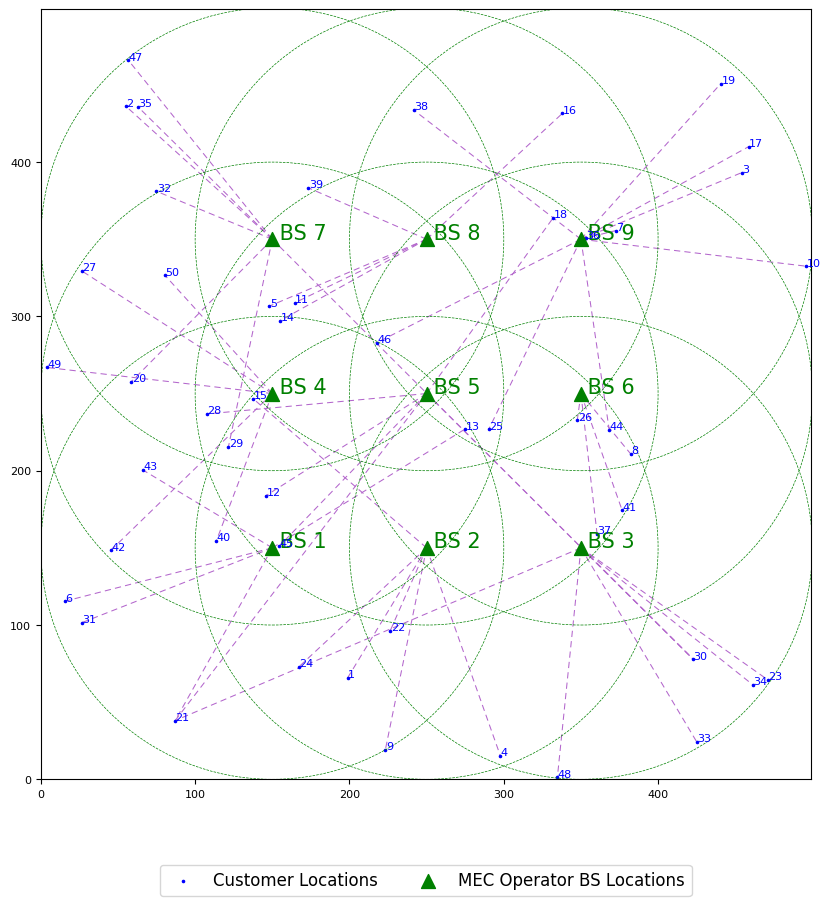

In [250]:
# Users connected to each BSs
users_bs = {}
for n in instance.N:
    l = []
    for u in instance.U:
        if (instance.x[n,u].value==0): continue
        l.append(u)

    print('BS',n,':services of users',l)
    users_bs[n]=l

# Users connected to the cloud
for u in instance.U:
    if instance.x[Nbs+1,u].value !=0:
        print("Customer service",u," located at cloud")


# Let's see what assignments BS-users exist
assignment = []
for u in instance.U:
    for n in instance.N:
        if (instance.x[n,u].value==0): continue
        assignment.append([(BSLoc[n-1][0],BSLoc[n-1][1]),\
                           (CustomerLoc[u-1][0],CustomerLoc[u-1][1])])


# Services assigned to the centralized cloud
cloud = []
for u in instance.U:
    if instance.x[Nbs+1,u].value !=0:
        cloud.append([u,CustomerLoc[u-1][0],CustomerLoc[u-1][1]])


# Plot customers assigned to different BSs
# Users assigned to the centralized cloud (if any) will be marked in red color and shown in the legend
PlotArea(W,H,CustomerLoc,BSLoc,assignment,cloud)

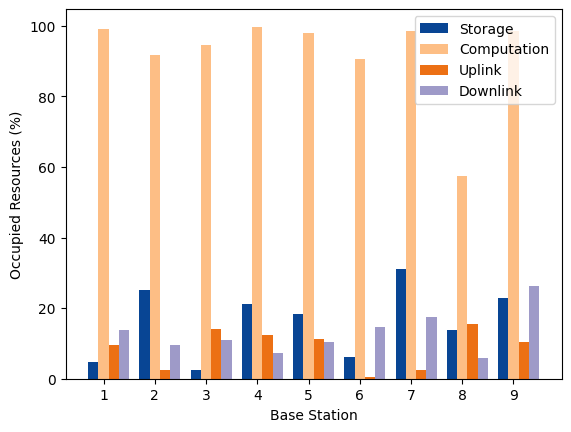

In [251]:
# RESOURCES OCCUPIED AT EACH BS due to the connected users (users_bs)

Resources = {}

for n in range(1,Nbs+1):
    Resources[n]=[]
    Resources[n].append(sum(ListStorage[u-1] for u in users_bs[n]))
    Resources[n].append(sum(ListComputation[u-1] for u in users_bs[n]))
    Resources[n].append(sum(ListUplink[u-1] for u in users_bs[n]))
    Resources[n].append(sum(ListDownlink[u-1] for u in users_bs[n]))

x = np.arange(Nbs)
y1 = [list_of_values[0]/Stg*100 for list_of_values in Resources.values()] # Storage data
y2 = [list_of_values[1]/Comp*100 for list_of_values in Resources.values()] # Computation data
y3 = [list_of_values[2]/Bup*100 for list_of_values in Resources.values()] # Uplink Bandwindth data
y4 = [list_of_values[3]/Bdown*100 for list_of_values in Resources.values()] # Uplink Bandwindth data
width = 0.2

# plot data in grouped manner of bar type

plt.bar(x-0.2, y1, width, color='#084594')
plt.bar(x, y2, width, color='#fdbe85')
plt.bar(x+0.2, y3, width, color='#ec7014')
plt.bar(x+0.4, y4, width, color='#9e9ac8')

plt.xticks(x, list(range(1, 10)))
plt.xlabel("Base Station")
plt.ylabel("Occupied Resources (%)")
plt.legend(["Storage", "Computation", "Uplink", "Downlink"])
plt.show()

### <font color=blue><b>EXERCISE 4</b></font>.-
#### Explain which is the meaning of the objective function and contraint 1.

In [252]:
'''By minimizing model.x[Nbs+1, u], the function seems to minimizing the number of users connected to the cloud rather than a base station.
This could imply a desire to minimize cloud resource usage or data transfer costs by encouraging connections to local base stations instead of relying on the cloud.'''

'By minimizing model.x[Nbs+1, u], the function seems to minimizing the number of users connected to the cloud rather than a base station.\nThis could imply a desire to minimize cloud resource usage or data transfer costs by encouraging connections to local base stations instead of relying on the cloud.'

In [253]:
'''Constraint 1 makes sure that each user is only connected to one BS or one cloud.'''

'Constraint 1 makes sure that each user is only connected to one BS or one cloud.'

### <font color=blue><b>EXERCISE 5</b></font>.-
#### Execute the model and analyze the result. Which is the resource that limits the users' connection to the BSs? Which is the resource less utilized in the BSs?

In [254]:
'''Uplink bandwidth is the resource that limits the users' connection to the BSs.'''

"Uplink bandwidth is the resource that limits the users' connection to the BSs."

In [255]:
'''Computation power is the resource that is less utilized in the BSs'''

'Computation power is the resource that is less utilized in the BSs'

### <font color=blue><b>EXERCISE 6</b></font>.-
#### Add a new constraint limiting the distance between the user and the corresponding base station to  D meters (parameter already defined) using the Python-programmed function Distance(p1,p2). Run the model for a specific value of D and analyse the results.

In [256]:
###Distance Constraint

'''def dist_rule(model, n, u):
    return model.x[n, u] * Distance(BSLoc[n-1], CustomerLoc[u-1]) <= D

model.DistanceConstraint = Constraint(model.N, model.U, rule=dist_rule)'''

'''Results with D=100: 10/12 located at cloud.
Results with D=1: All located at cloud.
Results with D=10^10: 4 located at cloud
'''

'Results with D=100: 10/12 located at cloud.\nResults with D=1: All located at cloud.\nResults with D=10^10: 4 located at cloud\n'

In [257]:
'''Explanation: as D is the maximum distance in meters between a user and its BS, is D decreases, the user goes out of range and connects to cloud and vice versa.'''

'Explanation: as D is the maximum distance in meters between a user and its BS, is D decreases, the user goes out of range and connects to cloud and vice versa.'